# 🎓 Student Feedback Analysis Project

## 📍 Introduction

Collecting student feedback after academic sessions is essential — but analyzing it meaningfully can unlock valuable insights to improve teaching and course design.

In this project, we analyze structured feedback from students on various aspects of their learning experience. The dataset includes quantitative ratings (on a scale of 1–10) across categories such as:

- Subject knowledge of the instructor
- Clarity in explanation
- Use of presentations
- Assignment difficulty
- Doubt-solving support
- Course structure and relevance

The goal is to identify strengths, areas for improvement, and provide actionable recommendations based on trends in the feedback data.

We use Python libraries such as `pandas`, `seaborn`, and `matplotlib` for data analysis and visualization.

---


In [1]:
from google.colab import files
uploaded = files.upload()


Saving student_feedback.csv to student_feedback.csv


In [7]:
import pandas as pd

df = pd.read_csv('student_feedback.csv')
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


## 🧹 Data Cleaning

In [8]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [10]:
# 1. Inspect
print(df.isnull().sum())

# 2. Drop rows missing essential data
df = df.dropna(subset=[
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Solves doubts willingly'
])


# 3. Fill non‑essential gaps
df['Structuring of the course'] = df['Structuring of the course'].fillna(0)

# 4. Confirm
print(df.isnull().sum())
print(df.shape)


Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
C

In [11]:
# Get average rating for each numeric (rating) column
print(df.mean(numeric_only=True).round(2))


Student ID                                              500.00
Well versed with the subject                              7.50
Explains concepts in an understandable way                6.08
Use of presentations                                      5.94
Degree of difficulty of assignments                       5.43
Solves doubts willingly                                   5.47
Structuring of the course                                 5.64
Provides support for students going above and beyond      5.66
Course recommendation based on relevance                  5.60
dtype: float64


## 📊 Rating Analysis

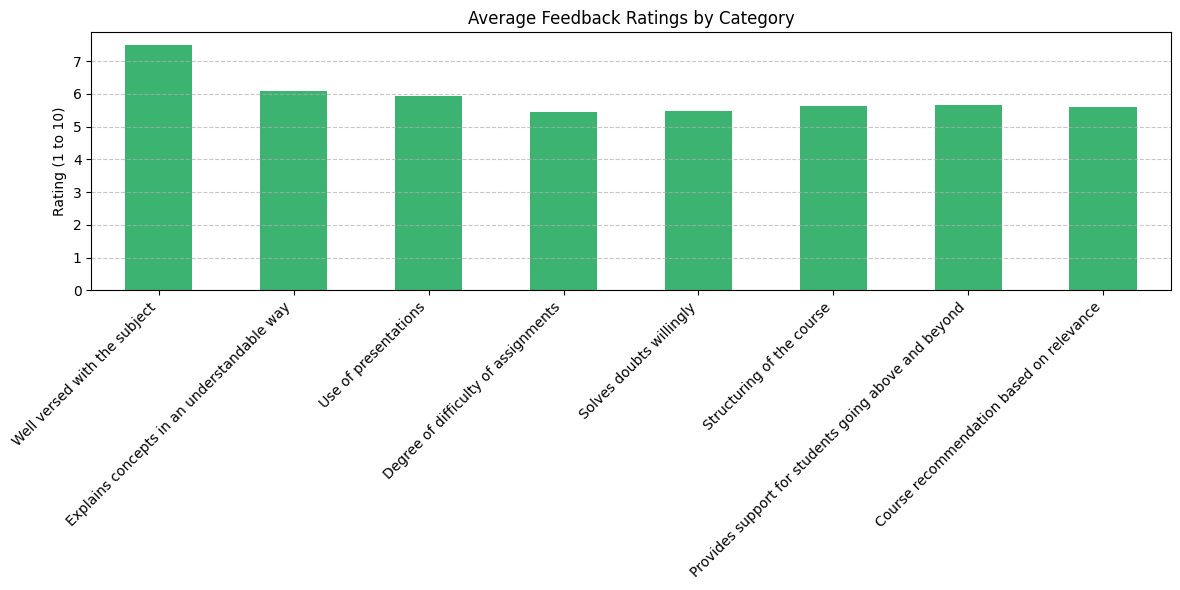

In [13]:
import matplotlib.pyplot as plt

# Select only rating columns (excluding Student ID)
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

# Calculate average ratings
avg_ratings = df[rating_columns].mean().round(2)

# Plot
plt.figure(figsize=(12,6))
avg_ratings.plot(kind='bar', color='mediumseagreen')
plt.title('Average Feedback Ratings by Category')
plt.ylabel('Rating (1 to 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-15-2207379857.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")


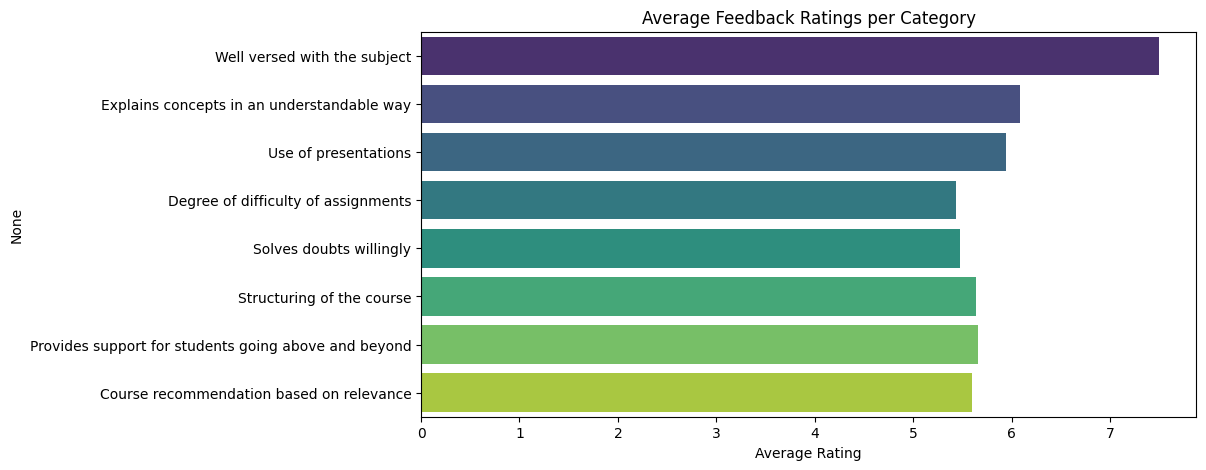

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_ratings = df.mean(numeric_only=True).drop('Student ID')

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")
plt.xlabel("Average Rating")
plt.title("Average Feedback Ratings per Category")
plt.show()


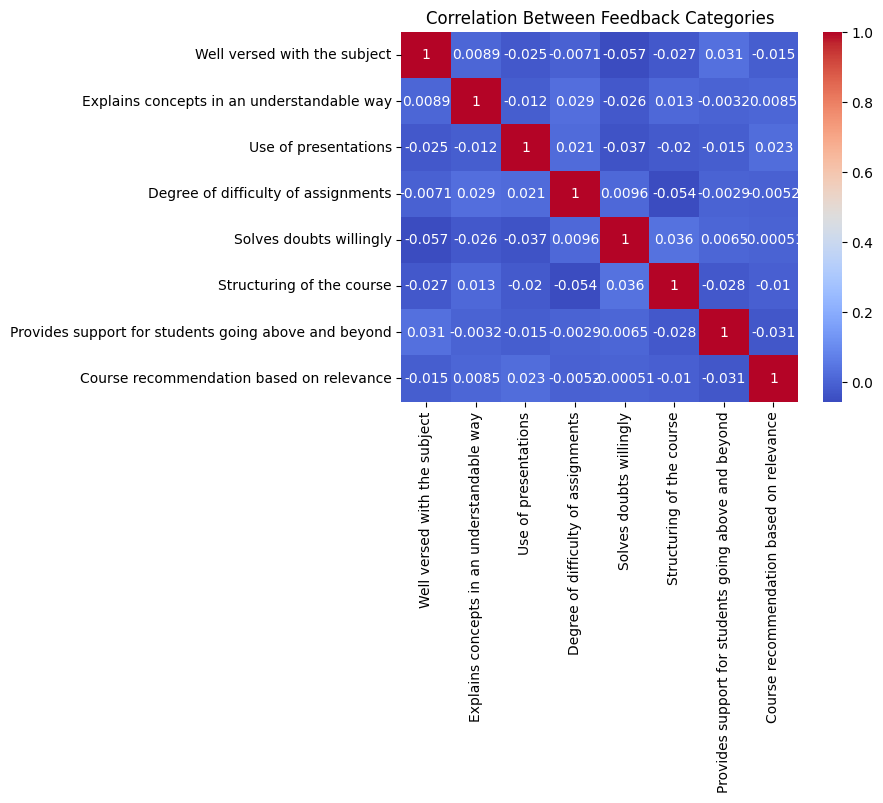

In [16]:
sns.heatmap(df.drop(columns=['Student ID']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Feedback Categories")
plt.show()


In [17]:
avg_ratings = df.mean(numeric_only=True).round(2).sort_values(ascending=False)
print(avg_ratings)


Student ID                                              500.00
Well versed with the subject                              7.50
Explains concepts in an understandable way                6.08
Use of presentations                                      5.94
Provides support for students going above and beyond      5.66
Structuring of the course                                 5.64
Course recommendation based on relevance                  5.60
Solves doubts willingly                                   5.47
Degree of difficulty of assignments                       5.43
dtype: float64


## 🔍 Insights

1. **Top-rated aspect**  
   *Students rated **‘Well versed with the subject’** the highest with an average score of **7.50**, indicating that the instructor’s subject knowledge is well recognized and appreciated.*

2. **Moderately rated area**  
   *‘Explains concepts in an understandable way’ scored **6.08**, suggesting that while content knowledge is strong, there’s room to simplify or clarify explanations further.*

3. **Areas of concern**
   - **‘Use of presentations’** scored **5.94**, showing the need for more engaging or better-structured visual materials.
   - **‘Provides support for students going above and beyond’** and **‘Structuring of the course’** scored **5.66** and **5.64** respectively — highlighting the need for improved planning and mentorship.
   - **‘Course recommendation based on relevance’** received **5.60**, suggesting students may not fully see the course’s alignment with their goals or expectations.

4. **Lowest-rated categories**  
   *‘Solves doubts willingly’ (**5.47**) and ‘Degree of difficulty of assignments’ (**5.43**) were rated the lowest, pointing to possible challenges in student-instructor interaction and assignment clarity or complexity.*

---

## ✅ Recommendations

- **Enhance teaching clarity**  
  Use more relatable examples, simplified explanations, or interactive methods to make complex topics easier to understand.

- **Improve presentation quality**  
  Incorporate engaging visual aids such as slides, diagrams, and short videos to improve student attention and learning.

- **Restructure course layout**  
  Provide a clear syllabus, timeline, and weekly learning objectives to enhance the course's perceived structure and organization.

- **Increase support for doubt-solving**  
  Allocate dedicated time during or after sessions for addressing student queries, and consider adding office hours or doubt-clearing groups.

- **Review and refine assignments**  
  Ensure assignments are appropriately challenging, clearly worded, and aligned with what was taught in class.

- **Align course content with real-world relevance**  
  Include practical examples, projects, or case studies to improve engagement and increase the recommendation score.


## 📝 Conclusion

This analysis of student feedback provided key insights into how academic sessions are being perceived by learners.

The data revealed that while students appreciated the instructor’s subject knowledge, several areas — such as clarity in explanation, course structure, and support for doubts — have room for improvement. The lowest-rated aspect was the difficulty of assignments, suggesting that students may need more structured guidance.

By visualizing average ratings and interpreting trends, we identified both strengths and weaknesses in the teaching approach. These insights can help instructors and organizers make data-driven improvements to future courses, ensuring a better learning experience for students.

While this analysis focused on numerical feedback, incorporating textual feedback (comments or suggestions) in future surveys would enable deeper sentiment analysis and a more comprehensive understanding of student needs.


## 📝 Note on Sentiment Analysis

The dataset used in this project did not include open-ended comments or textual feedback from students. Since sentiment analysis typically requires free-text responses, this step was not applicable in our case.

However, all structured (rating-based) feedback was cleaned, analyzed, and visualized to extract meaningful insights and recommendations.
